In [1]:
# import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('MLProjectData.csv')

# examine if there are missing values
df.isnull().sum()

# separate variables and target
X = df.iloc[:, 0:85]
y = df.iloc[:, 85]

# Use boxcox to transform y
# from scipy import stats
# bc = stats.boxcox(y)
# y = bc[0]
# ld = bc[1]

# Convert binary variables into numeric
X.iloc[:,59:] = X.iloc[:, 59:].values*1

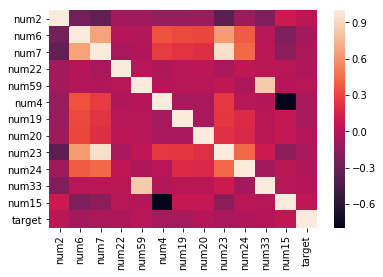

In [5]:
# correlation matrix
import seaborn as sns
df_sub = df.iloc[:,[1,5,6,21,58,3,18,19,22,23,32,14,85]]
corr = df_sub.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


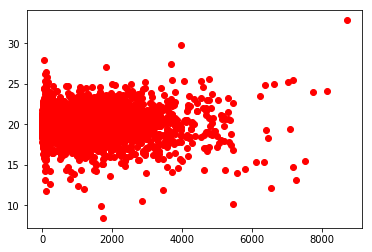

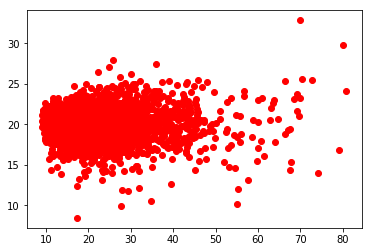

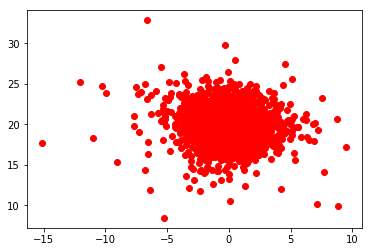

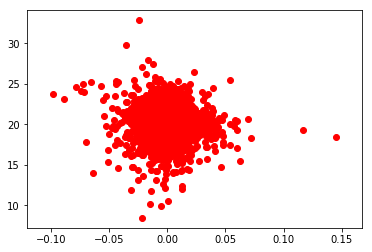

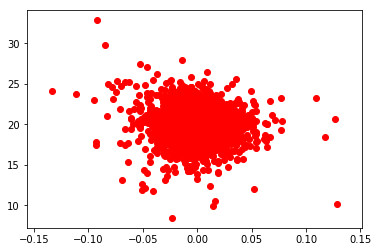

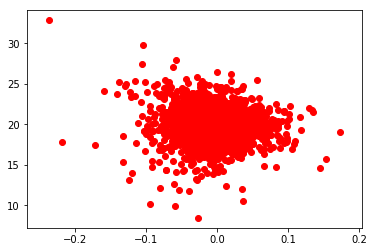

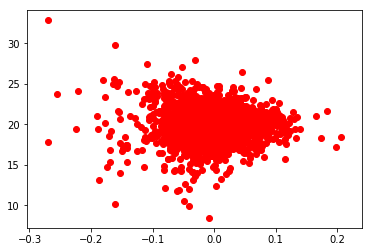

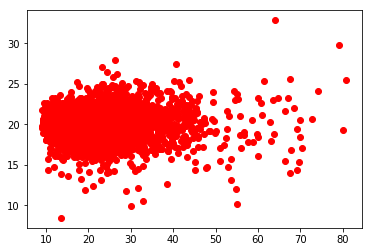

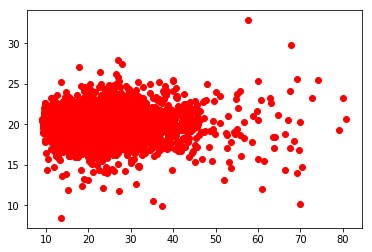

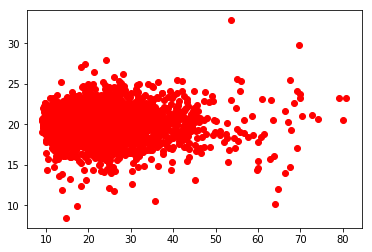

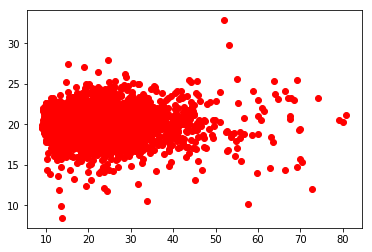

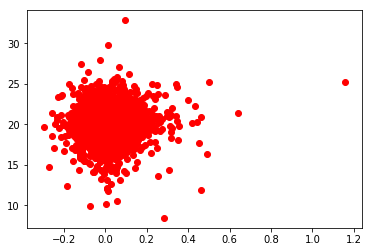

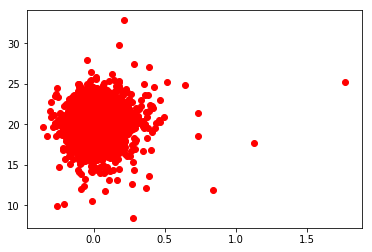

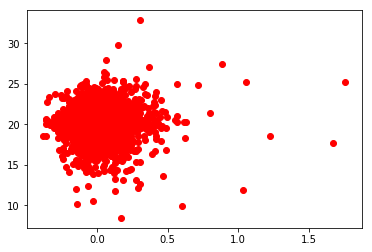

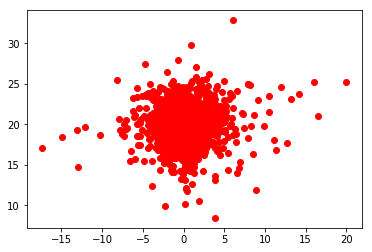

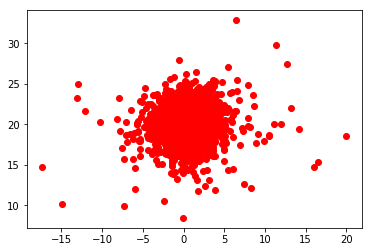

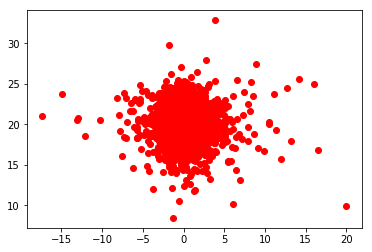

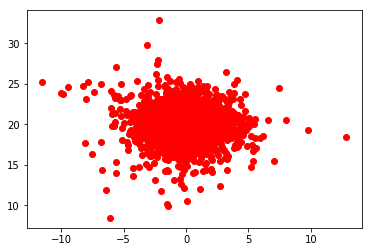

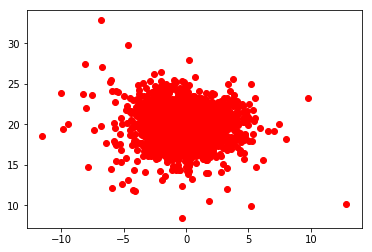

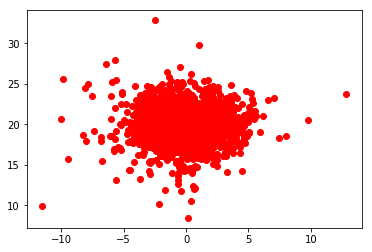

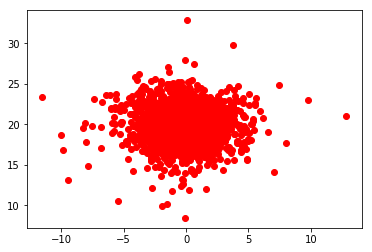

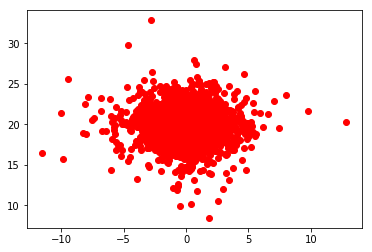

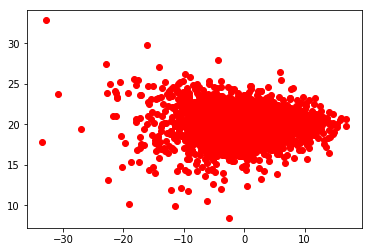

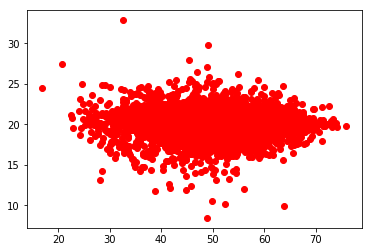

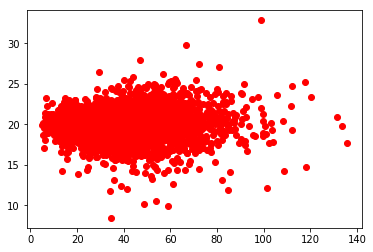

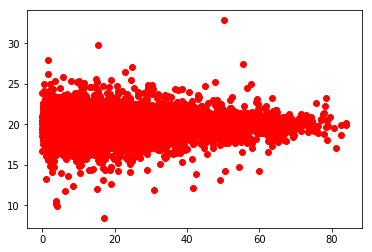

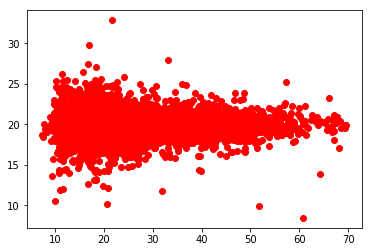

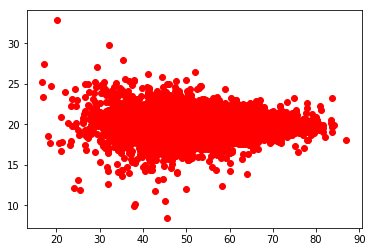

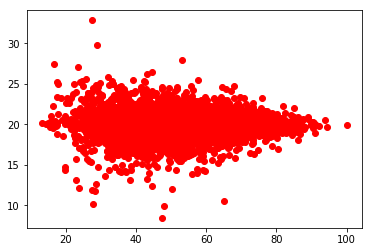

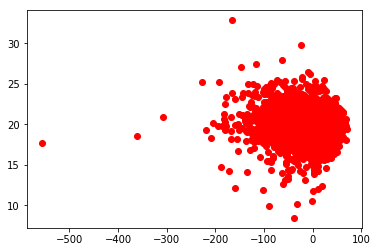

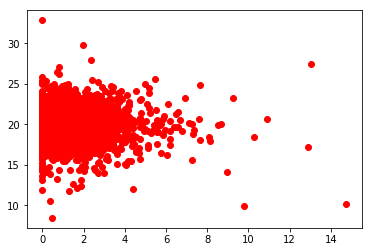

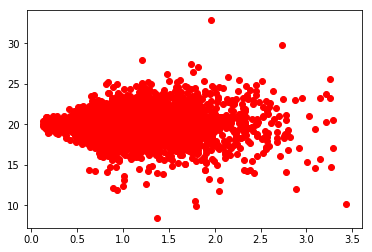

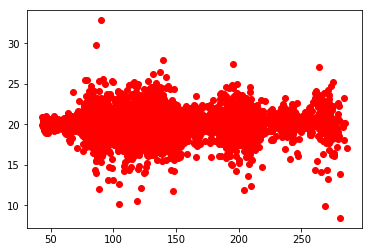

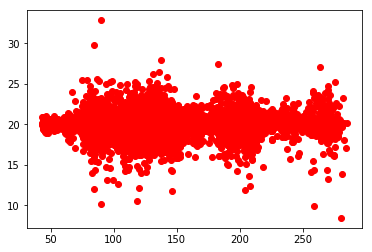

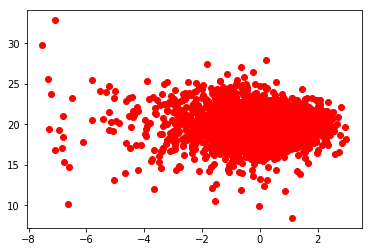

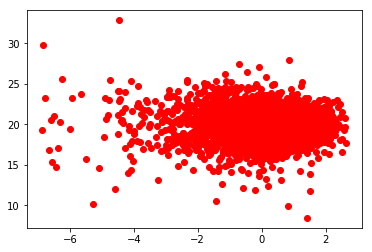

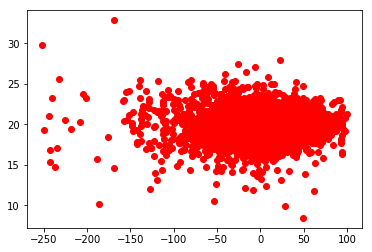

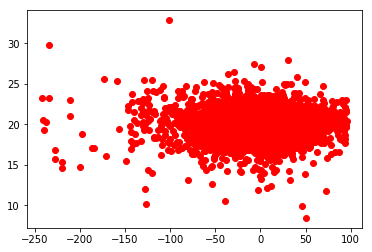

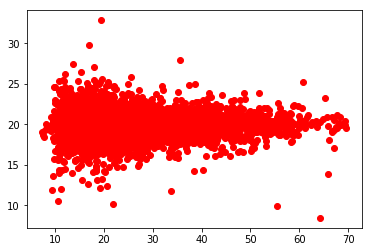

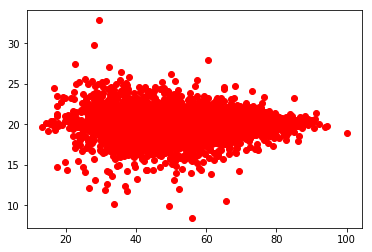

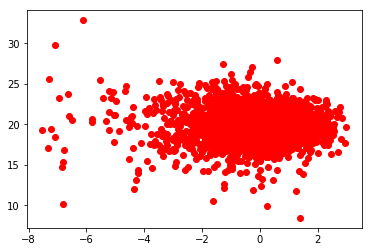

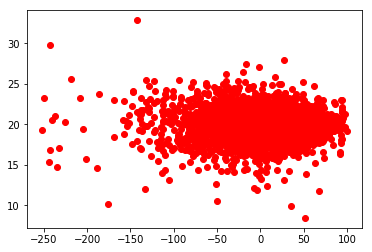

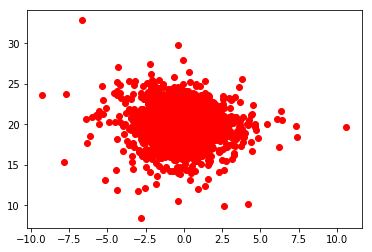

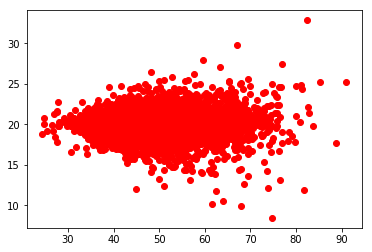

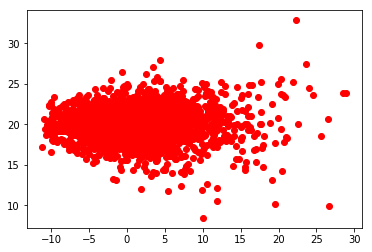

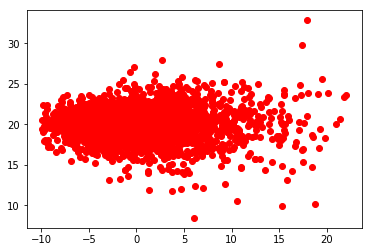

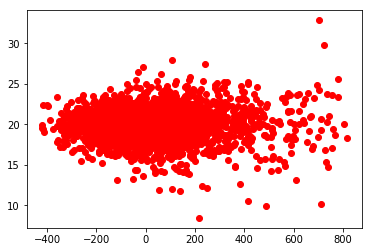

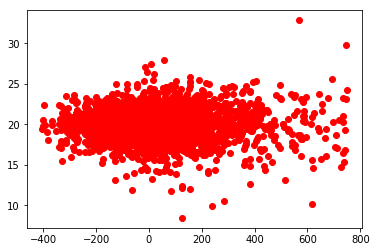

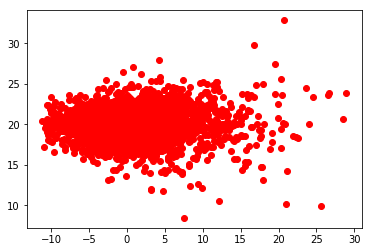

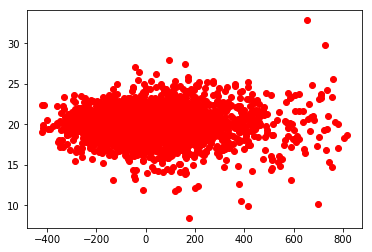

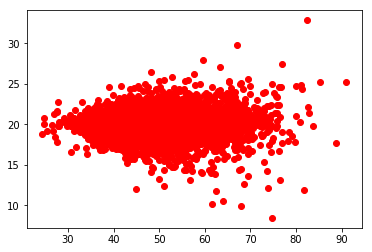

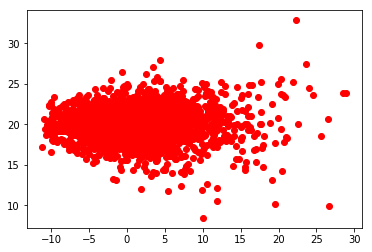

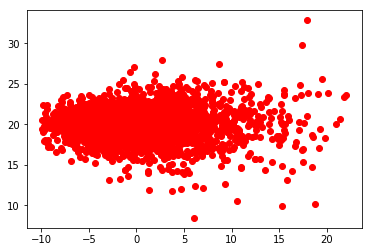

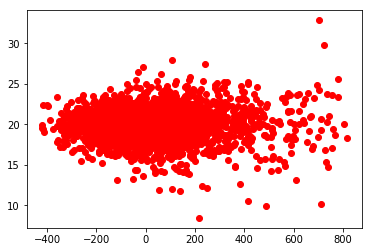

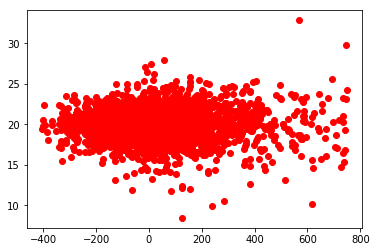

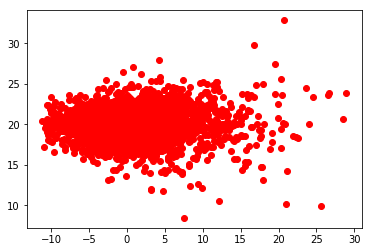

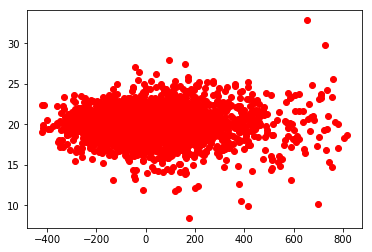

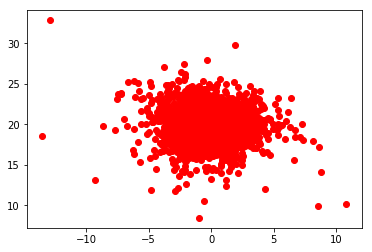

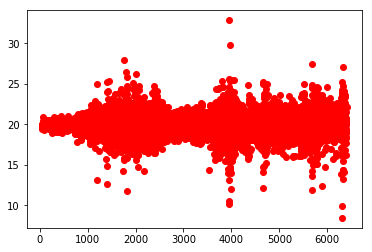

In [15]:
# scatter plot
for i in range(0,59):
    plt.figure()
    plt.scatter(df.iloc[:,[i]], df.iloc[:, 85], color='r')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


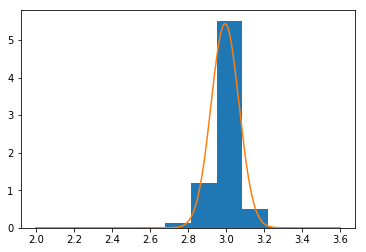

In [8]:
# examine the target's distribution
import numpy as np
from scipy import stats 
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
# Fit a normal distribution to the data:
y = np.array(y)
y_plt = np.log(y)
mu, std = norm.fit(y_plt)

# plot normed histogram
plt.hist(y_plt, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(y_plt))

# See if the target fits normal distribution
m, s = stats.norm.fit(y_plt) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it


plt.show()

In [2]:
# Use One Hot Encoding (dummy variables) to handle categorical variables
X_OHE = pd.get_dummies(X)

# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_OHE, y, test_size = .2, random_state = 0)

In [19]:
# Calculate the baseline model MAE
y_train = np.array(y_train)
y_test = np.array(y_test)
baseline_preds = np.mean(y_train)
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 4))

Average baseline error:  0.9934


In [400]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees, the random seed = 0
rf = RandomForestRegressor(n_estimators = 700, random_state = 0, max_features = 5)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

# Find the most important features
feature_list = list(range(1,101))
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Mean Absolute Error: 7.6917 degrees.
Variable:                   58 Importance: 0.03
Variable:                    1 Importance: 0.02
Variable:                    2 Importance: 0.02
Variable:                    3 Importance: 0.02
Variable:                    4 Importance: 0.02
Variable:                    5 Importance: 0.02
Variable:                    6 Importance: 0.02
Variable:                    7 Importance: 0.02
Variable:                    8 Importance: 0.02
Variable:                    9 Importance: 0.02
Variable:                   10 Importance: 0.02
Variable:                   11 Importance: 0.02
Variable:                   12 Importance: 0.02
Variable:                   13 Importance: 0.02
Variable:                   14 Importance: 0.02
Variable:                   15 Importance: 0.02
Variable:                   16 Importance: 0.02
Variable:                   17 Importance: 0.02
Variable:                   18 Importance: 0.02
Variable:                   19 Importance: 0.02
Var

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

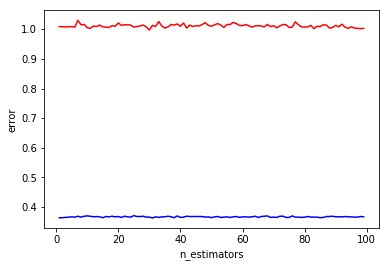

In [23]:
# examine how different parameter affects the performance
from sklearn.ensemble import RandomForestRegressor
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestRegressor(max_features=max_feature, n_estimators = 50, n_jobs=-1, random_state = 0)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    train_errors = round(np.mean(abs(train_pred - y_train)), 3)
    test_errors = round(np.mean(abs(test_pred - y_test)), 3)
    train_results.append(train_errors)
    test_results.append(test_errors)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_features, train_results, 'b', label='Train error')
line2 = plt.plot(max_features, test_results, 'r', label='Test error')
plt.ylabel('error')
plt.xlabel('n_estimators')
plt.show()

In [26]:
# use random grid to find best parameter combination
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 5)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 3, stop = 15, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [float(x) for x in np.linspace(0.1, 0.9, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [float(x) for x in np.linspace(0.1, 0.5, num = 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, random_state = 0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

{'n_estimators': [50, 100, 150, 200, 250], 'max_features': [3, 6, 9, 12, 15], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [0.1, 0.30000000000000004, 0.5, 0.7000000000000001, 0.9], 'min_samples_leaf': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5], 'bootstrap': [True, False]}
{'n_estimators': 200, 'min_samples_split': 0.9, 'min_samples_leaf': 0.1, 'max_features': 6, 'max_depth': 60, 'bootstrap': False}


In [33]:
# use grid search to test all the combination of parameters
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [50, 60, 70],
    'max_features': [5,6,7],
    'min_samples_leaf': [0.05, 0.1, 0.2],
    'min_samples_split': [0.8, 0.9, 0.95],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'bootstrap': False, 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 0.05, 'min_samples_split': 0.95, 'n_estimators': 100}


In [34]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 6, max_depth = 70, min_samples_leaf = 0.05, bootstrap = False, min_samples_split = 0.95, random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

Mean Absolute Error: 0.9922 degrees.


In [320]:
# xgBoost
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.025,
                          max_depth = 5, n_estimators = 250, random_state = 0)
# Train the model
xg_reg.fit(X_train,y_train)
# Make prediction on test data
predictions = xg_reg.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

# Find the most important features
feature_list = list(range(1,101))
# Get numerical feature importances
importances = list(xg_reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Mean Absolute Error: 7.6663 degrees.
Variable:                    1 Importance: 0.05000000074505806
Variable:                    2 Importance: 0.03999999910593033
Variable:                    3 Importance: 0.03999999910593033
Variable:                    4 Importance: 0.03999999910593033
Variable:                   19 Importance: 0.03999999910593033
Variable:                    5 Importance: 0.029999999329447746
Variable:                    6 Importance: 0.029999999329447746
Variable:                   16 Importance: 0.029999999329447746
Variable:                   21 Importance: 0.029999999329447746
Variable:                    7 Importance: 0.019999999552965164
Variable:                    8 Importance: 0.019999999552965164
Variable:                    9 Importance: 0.019999999552965164
Variable:                   10 Importance: 0.019999999552965164
Variable:                   12 Importance: 0.019999999552965164
Variable:                   13 Importance: 0.019999999552965164
Variable

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [331]:
# xgBoost, 500, 0.01, 7.6904
import xgboost as xgb
for lr in 
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.2,
                              max_depth = 5, n_estimators = 50, random_state = 0)
    # Train the model
    xg_reg.fit(X_train,y_train)
    # Make prediction on test data
    predictions = xg_reg.predict(X_test)
    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    # Print out the mean absolute error
    print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

# Find the most important features
feature_list = list(range(1,101))
# Get numerical feature importances
importances = list(xg_reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Mean Absolute Error: 7.8267 degrees.
Variable:                    1 Importance: 0.03999999910593033
Variable:                    2 Importance: 0.03999999910593033
Variable:                    4 Importance: 0.03999999910593033
Variable:                    5 Importance: 0.03999999910593033
Variable:                    6 Importance: 0.03999999910593033
Variable:                   19 Importance: 0.03999999910593033
Variable:                   22 Importance: 0.03999999910593033
Variable:                    3 Importance: 0.029999999329447746
Variable:                   21 Importance: 0.029999999329447746
Variable:                   29 Importance: 0.029999999329447746
Variable:                   32 Importance: 0.029999999329447746
Variable:                   34 Importance: 0.029999999329447746
Variable:                    7 Importance: 0.019999999552965164
Variable:                   12 Importance: 0.019999999552965164
Variable:                   13 Importance: 0.019999999552965164
Variable: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [30]:
# A parameter grid for XGBoost
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.3, 0.5, 0.6, 0.8],
        'max_depth': [3, 4, 5, 6, 8]
        }
model = xgb.XGBRegressor(learning_rate=0.2, n_estimators=500, objective='reg:linear', eval_metric='mae',
                    silent=True)
folds = 5
param_comb = 5

kf = KFold(n_splits=folds, shuffle = True, random_state = 0)

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='neg_mean_absolute_error', n_jobs=4, cv=kf.split(X_train,y_train), verbose=3, random_state=0)

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  2.9min finished



 All results:
{'mean_fit_time': array([25.45836191, 24.33097343, 35.33396897, 12.43077836, 27.97105417]), 'std_fit_time': array([0.76931582, 0.5643573 , 0.25434333, 0.08958948, 2.80552298]), 'mean_score_time': array([0.04288521, 0.03291211, 0.02593093, 0.02972078, 0.03031187]), 'std_score_time': array([0.00403894, 0.0006309 , 0.00295903, 0.00116348, 0.00372536]), 'param_subsample': masked_array(data=[0.6, 0.8, 1.0, 0.6, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 1, 10, 5, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 5, 8, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.5, 1.5, 2, 5, 2],
             mask=[False, False, False, False, False],
       fill_value='?',
     

In [332]:
# Neural Network
# select important variables
X_train_s = X_train.iloc[:, [1,2,3,4,5,6,16,19,21,58]]
X_test_s = X_test.iloc[:, [1,2,3,4,5,6,16,19,21,58]]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_s)
X_train_n = scaler.transform(X_train_s)
X_test_n = scaler.transform(X_test_s)
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(9), max_iter=1000, activation = 'tanh', random_state = 0)
mlp.fit(X_train_n, y_train)
predictions = mlp.predict(X_test_n)
errors = abs(predictions - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

Mean Absolute Error: 7.6645 degrees.


In [ ]:
# 10, 0.9911

In [333]:
# Ridge Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha = 10, normalize=True, random_state = 0)
rr.fit(X_train, y_train)
# Make prediction on test data
predictions = rr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

Mean Absolute Error: 7.6403 degrees.


In [ ]:
# alpha = 10, MAE = 0.9922

In [335]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0002, normalize=True, max_iter=10e5, random_state = 0)
lasso.fit(X_train,y_train)
df_coef = pd.DataFrame(data = lasso.coef_, index = range(0,100), columns = ['coef'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_coef[df_coef['coef'] != 0])
coeff_used = np.sum(lasso.coef_!=0)
# Make prediction on test data
predictions = lasso.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')
print('number of features used: ', coeff_used)

         coef
0   -0.000770
1    0.049787
2   -0.089053
3  -11.074353
4   28.883154
5  -32.266706
6   24.284298
12  -5.418947
13  -3.515607
14   0.587550
15   0.327595
16  -0.040908
17  -0.205868
18  -0.224616
19  -0.196523
20  -0.107191
21  -0.175864
22  -0.270252
23   0.022117
24  -0.019516
25   0.015689
29   0.010505
30   0.315120
31  -0.244108
33  -0.005090
37  -0.011609
39  -0.024627
42   0.242778
44   0.002181
45   0.102881
46  -0.003996
51   0.024005
52   0.109227
53  -0.003508
57  -0.900001
58   0.000503
59  -0.243213
60   0.290774
61   0.503309
62  -0.527601
63  -0.246517
64  -3.307473
65  -0.651488
67  -0.920041
68  -0.272120
69   1.609317
70  -0.552860
71   0.714077
72  -2.000083
73   0.861216
74  -0.385514
75  -0.588461
76  -0.451610
77  -0.183518
78  -0.158718
79   2.039984
80  -0.032944
81   0.301349
82   1.467912
83  -0.098482
84   0.254132
85   0.017718
86  -0.522999
88  -0.478466
90   0.217766
91   0.653876
92   0.042412
93  -0.513768
95  -0.723247
96  -1.061620
97   0

In [ ]:
# feature importance by lasso
# 5, 14, 57
# 21, 39, 61
# 0, 1, 13, 22, 25, 58, 62

In [382]:
# linear Regression, 0.9894 (use xgBoost, random forest, lasso important variables)
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
X_train_s = X_train.iloc[:, [1,5,6,21,58,3,18,19,22,23,32,14]]
X_test_s = X_test.iloc[:, [1,5,6,21,58,3,18,19,22,23,32,14]]

lm = LinearRegression()
lm.fit(X_train_s,y_train)
# Make prediction on test data
predictions = lm.predict(X_test_s)

predictions = np.power((predictions * ld) + 1, 1 / ld) - 1
y_test = np.power((y_test * ld) + 1, 1 / ld) - 1
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

# Check the statistics
X2 = sm.add_constant(X_train_s)
est = sm.OLS(y_train, X_train_s)
est2 = est.fit()
print(est2.summary())

Mean Absolute Error: 0.9893 degrees.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.504e+04
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:51:16   Log-Likelihood:                -21061.
No. Observations:                5080   AIC:                         4.215e+04
Df Residuals:                    5068   BIC:                         4.222e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num2           

Mean Absolute Error: 11.1027 degrees.
Mean Absolute Error: 9.5227 degrees.
Mean Absolute Error: 8.8713 degrees.
Mean Absolute Error: 8.5971 degrees.
Mean Absolute Error: 8.3818 degrees.
Mean Absolute Error: 8.2309 degrees.
Mean Absolute Error: 8.0988 degrees.
Mean Absolute Error: 8.0489 degrees.
Mean Absolute Error: 8.0638 degrees.
Mean Absolute Error: 8.0904 degrees.
Mean Absolute Error: 8.0316 degrees.
Mean Absolute Error: 7.9643 degrees.
Mean Absolute Error: 7.9393 degrees.
Mean Absolute Error: 7.9026 degrees.
Mean Absolute Error: 7.8706 degrees.
Mean Absolute Error: 7.8593 degrees.
Mean Absolute Error: 7.8442 degrees.
Mean Absolute Error: 7.8305 degrees.
Mean Absolute Error: 7.8161 degrees.
Mean Absolute Error: 7.7899 degrees.


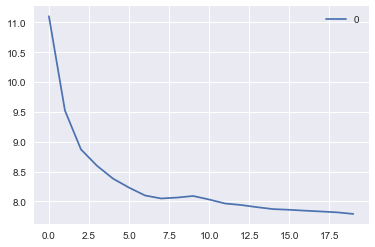

In [339]:
# KNN
# Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_s = scaler.fit_transform(X_train)
X_train_s = pd.DataFrame(X_train_s)

X_test_s = scaler.fit_transform(X_test)
X_test_s = pd.DataFrame(X_test_s)

from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline

# See what k give best result
MAE_val = []
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_s, y_train)  #fit the model
    pred = model.predict(X_test_s) #make prediction on test set
    errors = abs(pred - y_test) #calculate rmse
    MAE = round(np.mean(errors), 4)
    MAE_val.append(MAE) #store rmse values
    print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

        
# Plotting the MAE values against K values
curve = pd.DataFrame(MAE_val) 
curve.plot()

Mean Absolute Error: 10.6582 degrees.
Mean Absolute Error: 9.2673 degrees.
Mean Absolute Error: 8.8031 degrees.
Mean Absolute Error: 8.5496 degrees.
Mean Absolute Error: 8.4309 degrees.
Mean Absolute Error: 8.2876 degrees.
Mean Absolute Error: 8.1514 degrees.
Mean Absolute Error: 8.1412 degrees.
Mean Absolute Error: 8.0549 degrees.
Mean Absolute Error: 8.0429 degrees.
Mean Absolute Error: 8.0233 degrees.
Mean Absolute Error: 8.0148 degrees.
Mean Absolute Error: 7.9951 degrees.
Mean Absolute Error: 7.944 degrees.
Mean Absolute Error: 7.9439 degrees.
Mean Absolute Error: 7.9231 degrees.
Mean Absolute Error: 7.9317 degrees.
Mean Absolute Error: 7.9219 degrees.
Mean Absolute Error: 7.9261 degrees.
Mean Absolute Error: 7.9039 degrees.


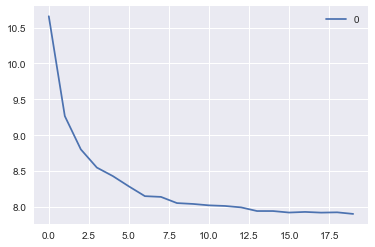

In [340]:
# Use different normalized scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

# See what k give best result
MAE_val = []
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_n, y_train)  #fit the model
    pred = model.predict(X_test_n) #make prediction on test set
    errors = abs(pred - y_test) #calculate rmse
    MAE = round(np.mean(errors), 4)
    MAE_val.append(MAE) #store rmse values
    print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')
    
# Plotting the MAE values against K values
curve = pd.DataFrame(MAE_val) 
curve.plot()